# Video Game Sales Analysis Project
## Project Overview

In this project, you'll analyze video game sales data to identify patterns that determine a game's success. Working as an analyst for the online store Ice, you'll use this information to help plan future advertising campaigns.

## Environment Setup and Required Libraries

In [1]:
# Import all required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

This project will focus on the video game industry, its goal is to understand and compare the factors that drive game sales and player preferences throughout the different regions of the world. Information from studies like these are very crucial for developers, publishers, and marketers. In this project, we analyze a dataset of video game sales to uncover trends and insights related to platform popularity, genre performance, regional differences, and the impact of ratings on sales. The goal is to provide a comprehensive overview by applying data anaylsis and statistical techniques to be able to highlight the key drivers to success in the gaming industry.

## Step 1: Loading and Initial Data Exploration

First, let's load our dataset and examine its basic properties:

In [2]:
# Load the dataset
df = pd.read_csv('games.csv')

In [3]:
# Display basic information about the dataset
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.shape

(16715, 11)

In [5]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [8]:
# Check for duplicate entries
duplicates = df.duplicated()
duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
16710    False
16711    False
16712    False
16713    False
16714    False
Length: 16715, dtype: bool

In [9]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


### Key Questions to Answer:
- What's the total number of records in our dataset?
- What data types are present in each column?
- Are there any obvious issues with the data?
- Do we see any immediate patterns or anomalies?

1. 16,715
2. Data Types Present: Object, float64, Int64
3. Obvious Issues? Missing values that may or may not have to be fixed.
4. Immediate patterns or anomalies? 'TBD' 

## Step 2: Data Preparation

### 2.1 Standardizing Column Names

In [10]:
# Convert column names to lowercase
df.columns = df.columns.str.lower()

In [11]:
# Verify the changes
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2.2 Data Type Conversion

In [12]:
# Check current data types
print(df.dtypes)

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object


In [13]:
# Make changes to data types if necessary
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce').astype('Int64')
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce').astype('Int64')

df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df['user_score'] = df['user_score'].astype('float64')

# Describe the columns where the data types have been changed and why.

The columns I have changed are the following:
1. year_of_release: from float64 to Int64 (because these are years, no decimal points or anything else, just a solid number. I chose to leave the missing values as NaN so the calculations will safely ignore them in the future.)
2. critic_score: from float64 to Int64 (because these are all numbers consisting of only 2 numbers each, no decimals or anything extra. I chose to leave the missing values as NaN so the calculations will safely ignore them in the future.)
3. user_score: from object to float64 (because an object is things like words or strings of numbers, this was clearly an interger as they are numbers with decimal points. There are some lines that have "tbd" I had them changed to NaN.)
4. I chose these options for each conversion because they were the safest option. 

In [14]:
# Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.

So far I have seen it only in user_score column and to be able to change the data type of the column I changed the "tbd" instances to 'NaN'. 

### 2.3 Handling Missing Values

In [15]:
# Examine missing values
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [16]:
# Calculate percentage of missing values
print(df.isna().mean() * 100)

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64


In [17]:
# Analyze patterns in missing values.
print(df[df.isna().any(axis=1)])

                                name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES             1985      Platform   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                             Tetris       GB             1989        Puzzle   
9                          Duck Hunt      NES             1984       Shooter   
10                        Nintendogs       DS             2005    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  ot

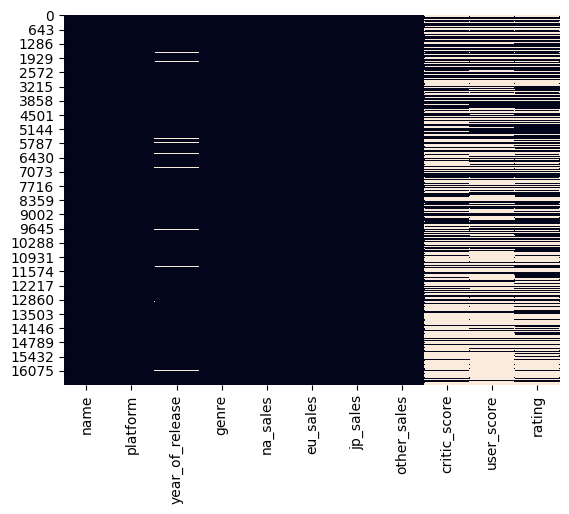

In [18]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [19]:
# Handle missing values based on analysis
# Your code here to handle missing values according to your strategy
df = df.dropna(subset=['name'])

In [20]:
df = df.dropna(subset=['year_of_release'])
df['year_of_release'] = df['year_of_release'].fillna(0)

In [21]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [22]:
# Why do you think the values are missing? Give possible reasons.

It probably has to do with how old the release might be, that could possibly cause it to have missing or unreliable data like the release year(given it pre-dates technology like digital record keeping). Or a more likely answer is that it's a game that didn't have an official release year(unreleased). 

In [23]:
# Explain why you filled in the missing values as you did or why you decided to leave them blank.

Since it's just for the year_of_release I decided to go ahead and fill in the missing values with (0), because I know I don't have to worry about if the zeroes will affect the data in anyway like in future calculations, for example. 

### 2.4 Calculate Total Sales

In [24]:
# Calculate total sales across all regions and put them in a different column
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


# Step 3: Analyzing Video Game Sales Data

## 3.1 Temporal Analysis of Game Releases
Let's first examine the distribution of game releases across different years to understand our data's coverage and significance:

In [25]:
# Create a DataFrame with game releases by year
games_by_year = df.groupby('year_of_release').size().reset_index(name='game_count')
games_by_year.head()

,year_of_release,game_count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


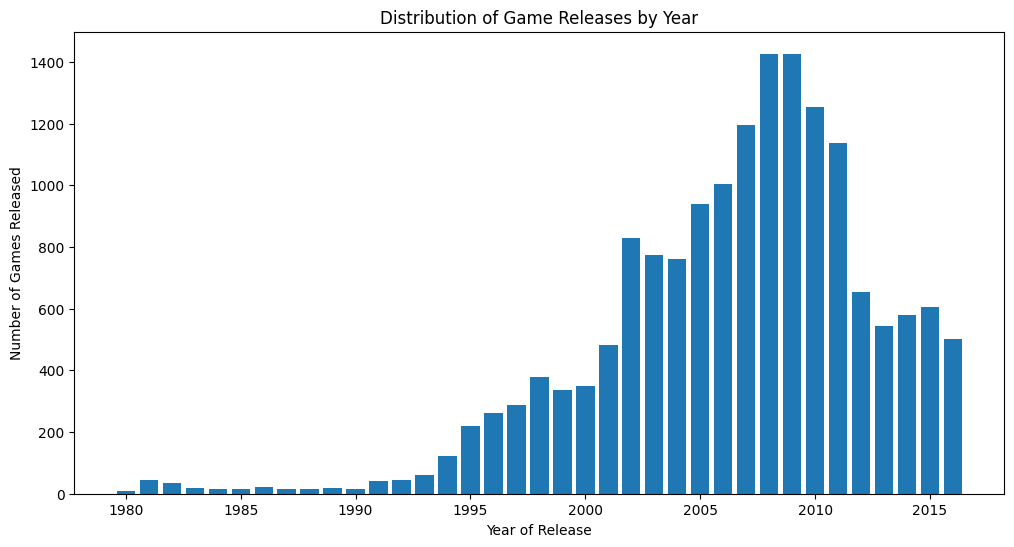

In [26]:
# Visualize the distribution of games across years
plt.figure(figsize=(12,6))
plt.bar(games_by_year['year_of_release'], games_by_year['game_count'])
plt.xlabel('Year of Release')
plt.ylabel('Number of Games Released')
plt.title('Distribution of Game Releases by Year')
plt.show()

In [27]:
# Display summary statistics for each year
yearly_stats = df.groupby('year_of_release').agg(
    game_count=('name', 'count'),
    mean_sales=('total_sales', 'mean'),
    median_sales=('total_sales', 'median'),
    total_sales=('total_sales', 'sum')
).reset_index()

yearly_stats.head()

,year_of_release,game_count,mean_sales,median_sales,total_sales
0,1980,9,1.264444,0.770,11.38
1,1981,46,0.775652,0.465,35.68
2,1982,36,0.802222,0.540,28.88
3,1983,17,0.988235,0.770,16.80
4,1984,14,3.596429,1.485,50.35


In [28]:
games_by_year.sort_values('game_count', ascending=False).head()

,year_of_release,game_count
28,2008,1427
29,2009,1426
30,2010,1255
27,2007,1197
31,2011,1136


### Questions to Consider:
- Which years show significant numbers of game releases?
- Are there any notable trends or patterns in the number of releases?
- Is there enough recent data to make predictions for 2017?

1. The years that show a significant numbers of game releases are: 2007-2011.
2. It looks like there was a really stable period for about 5 years maybe more where the sales were higher than they've ever been, then a huge decline that doesn't look like it has recovered. As a millenial baby, who has never played like actual video games, I can remember how big (Rock Band, Guitar Hero, and Wii) were throughout all of those years, when I was in middle school and high school, and I actually had Rock Band(that's how popular it was, we got a gaming system just to play Rock Band, we never had a single other game for it). I feel like that was a major contributor to the spike in sales.
3. I don't think I have enough data to make an accurate prediction for 2017, but I will try. It obviously took a large dip after that huge spike but I want to point out that even after 2015 it goes down quite a bit so what's to say the same thing doesn't happen in 2017. With how popular online gaming has become over the last what decade(?), I would expect that number will only keep on declining, and will probably eventually start to look like the begining of the distrubtion chart. 

## 3.2 Platform Sales Analysis Over Time

Now let's analyze how sales vary across platforms and years:

In [29]:
# Calculate total sales by platform and year
sales_by_platform_year = df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
sales_by_platform_year.head()

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27


In [30]:
# Create a heatmap of platform sales over time
heatmap_data = sales_by_platform_year.pivot(index='platform', columns='year_of_release', values='total_sales')

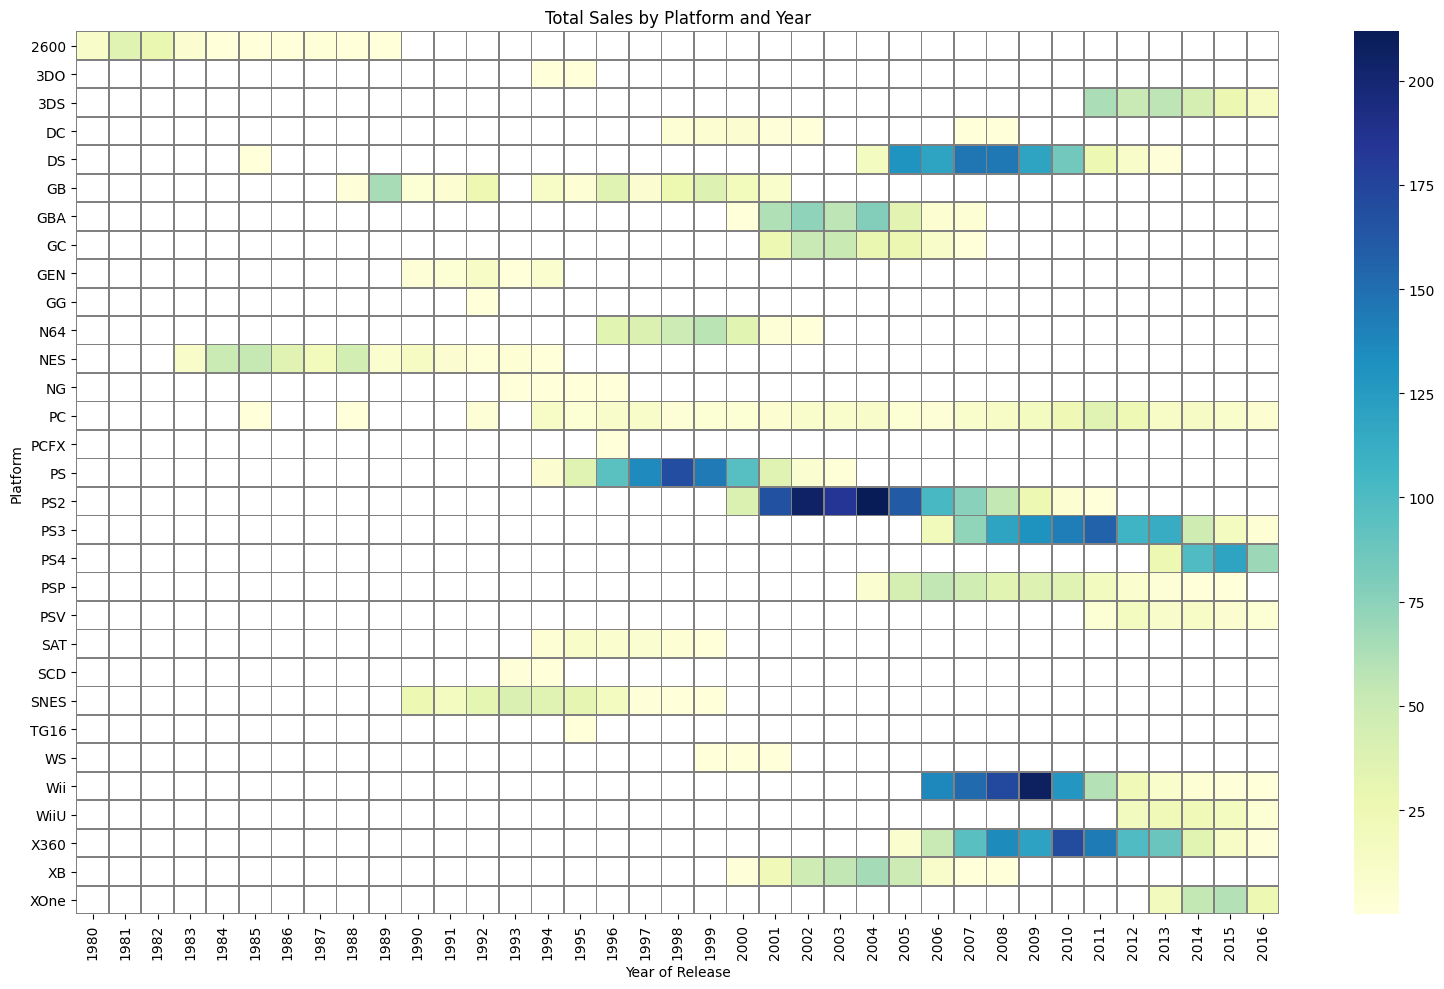

In [31]:
plt.figure(figsize=(16,10))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title('Total Sales by Platform and Year')
plt.xlabel('Year of Release')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()

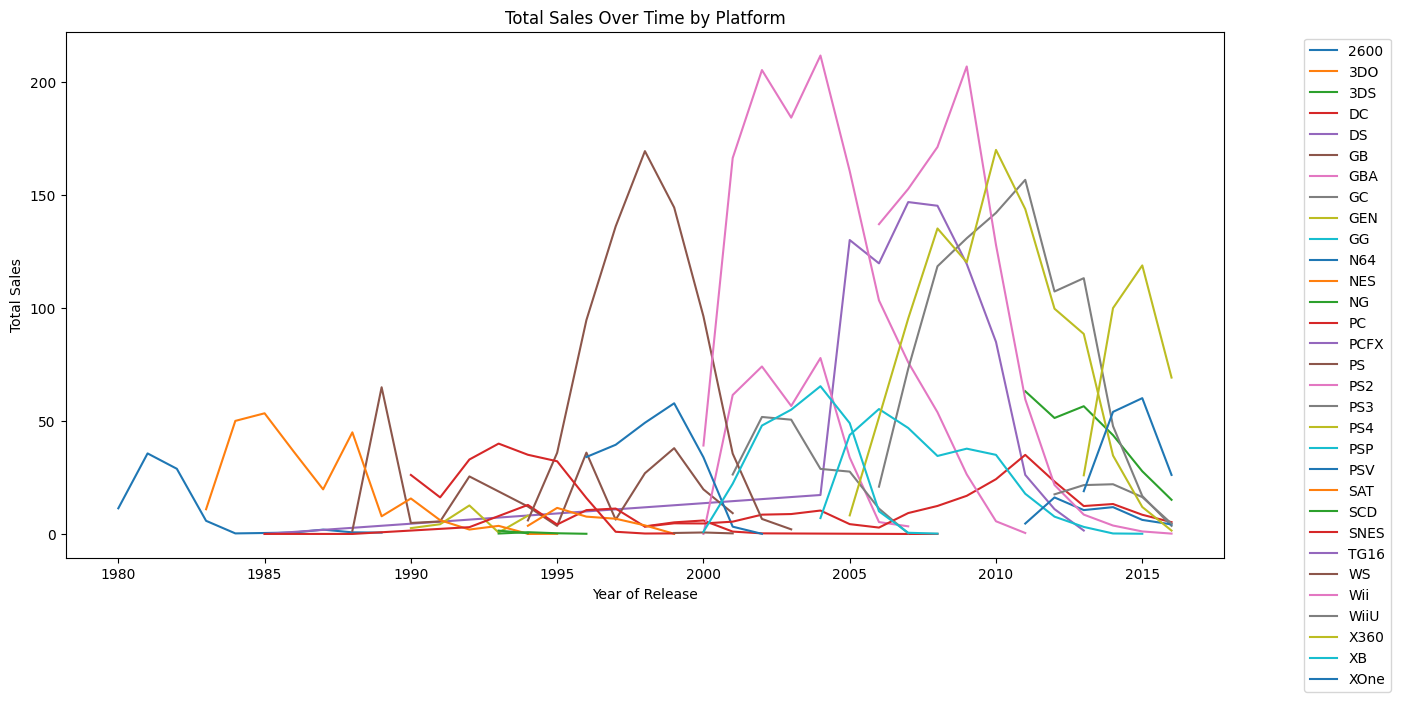

In [32]:
# Identify platforms with declining sales
platforms = sales_by_platform_year['platform'].unique()
plt.figure(figsize=(14, 7))
for platform in platforms:
    data = sales_by_platform_year[sales_by_platform_year['platform'] == platform]
    plt.plot(data['year_of_release'], data['total_sales'], label=platform)

plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Time by Platform')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

In [33]:
# Calculate mean and standard deviation of sales for each platform
platform_sales_stats = sales_by_platform_year.groupby('platform')['total_sales'].agg(['mean', 'std']).reset_index()

# Calculate coefficient of variation (std/mean)
platform_sales_stats['cv'] = platform_sales_stats['std'] / platform_sales_stats['mean']

# Sort by CV to find most consistent (lowest CV)
consistent_platforms = platform_sales_stats.sort_values('cv')
print(consistent_platforms)

   platform        mean        std        cv
25       WS    0.473333   0.200333  0.423239
2       3DS   42.968333  18.278261  0.425389
27     WiiU   16.438000   7.068244  0.429994
30     XOne   39.830000  20.313977  0.510017
18      PS4   78.535000  40.567917  0.516558
20      PSV    8.968333   4.729695  0.527377
17      PS3   84.667273  54.637565  0.645321
7        GC   28.104286  18.845004  0.670538
10      N64   31.144286  21.875933  0.702406
21      SAT    5.598333   3.967591  0.708709
28     X360   80.103333  57.484408  0.717628
16      PS2  102.796667  79.405729  0.772454
23     SNES   20.004000  15.479666  0.773829
13       PC    9.836923   7.997666  0.813025
19      PSP   24.127500  20.190759  0.836836
6       GBA   39.110000  32.768255  0.837848
8       GEN    5.670000   4.771095  0.841463
4        DS   72.980000  61.673155  0.845069
1       3DO    0.050000   0.042426  0.848528
12       NG    0.360000   0.308004  0.855568
22      SCD    0.930000   0.806102  0.866776
15       P

In [34]:
# Platforms with sales in recent years
# Get the most recent years
most_recent_year = sales_by_platform_year['year_of_release'].max()
recent_years = [most_recent_year - i for i in range(3)]

# Platforms with sales ever
all_platforms = sales_by_platform_year['platform'].unique()

# Platforms with sales in recent years
active_platforms = sales_by_platform_year[
    sales_by_platform_year['year_of_release'].isin(recent_years) &
    (sales_by_platform_year['total_sales'].fillna(0) > 0)
]['platform'].unique()

# Platforms with NO sales (or missing data) in recent years
disappeared_platforms = [p for p in all_platforms if p not in active_platforms]

print("Platforms that have disappeared from the market:", disappeared_platforms)

Platforms that have disappeared from the market: ['2600', '3DO', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PCFX', 'PS', 'PS2', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'XB']


### Questions to Consider:
- Which platforms show consistent sales over time?
- Can you identify platforms that have disappeared from the market?
- What's the typical lifecycle of a gaming platform?

1. The platforms that show the most consistent sales over time would be: ('WS', '3DS', 'WiiU', 'XOne', and 'PS4')
2. These are all the platforms that have disappeared from the market over time: ('2600', '3DO', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PCFX', 'PS', 'PS2', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', and 'XB')
3. So a typical "lifecyle" of a gaming platform would be considered The Launch, Growth, Maturity, the Eventual Decline, and Probable Discontinuation. 

## 3.3 Determining Relevant Time Period

Based on your analysis above, determine the appropriate time period for predicting 2017 sales:

In [35]:
# Your code here to filter the dataset to relevant years
relevant_years = [2014, 2015, 2016] 
df_relevant = df[df['year_of_release'].isin(relevant_years)]

df_relevant.head()

# Justify your choice with data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,NaN,7.98


In [36]:
print(df['year_of_release'].value_counts().sort_index())

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


### Document Your Decision:
- What years did you select and why?
- How does this period reflect current market conditions?
- What factors influenced your decision?

1-3. I selected 2014, 2015, and 2016 as the relevant years because: these are the most recent years with complete data. Each year has a relatively large number of records, making them statistically significant. Data from before 2014 may not be as relevant to current market trends. The data for 2017 appears incomplete and would be therefore not suitable for use. 

## 3.4 Platform Performance Analysis

Using your selected time period, let's analyze platform performance:

In [37]:
# Analyze platform sales trends
platform_trends = df_relevant.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
platform_trends.head()

,platform,year_of_release,total_sales
0,3DS,2014,43.76
1,3DS,2015,27.78
2,3DS,2016,15.14
3,PC,2014,13.28
4,PC,2015,8.52


In [38]:
# Sort platforms by total sales
platform_totals = df_relevant.groupby('platform')['total_sales'].sum().reset_index()
platform_totals = platform_totals.sort_values(by='total_sales', ascending=False)
platform_totals

,platform,total_sales
3,PS4,288.15
9,XOne,140.36
0,3DS,86.68
2,PS3,68.18
8,X360,48.22
7,WiiU,42.98
1,PC,27.05
5,PSV,22.40
6,Wii,5.07
4,PSP,0.36


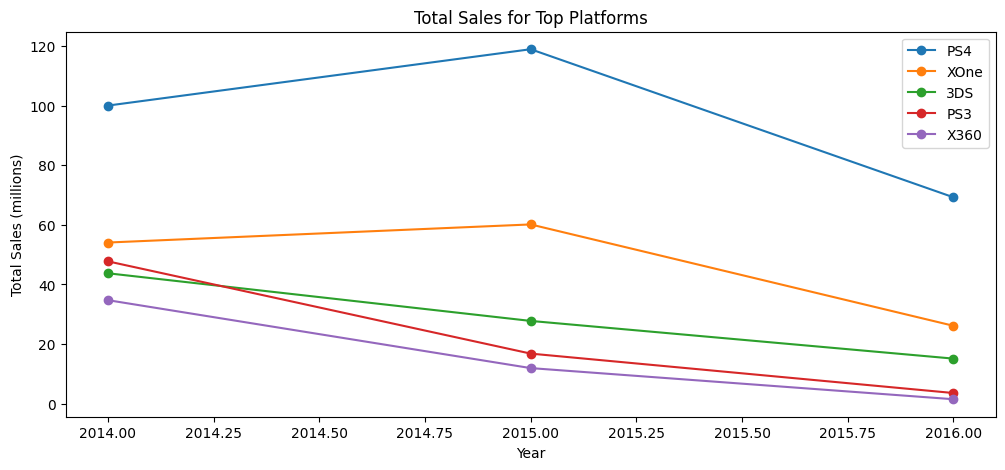

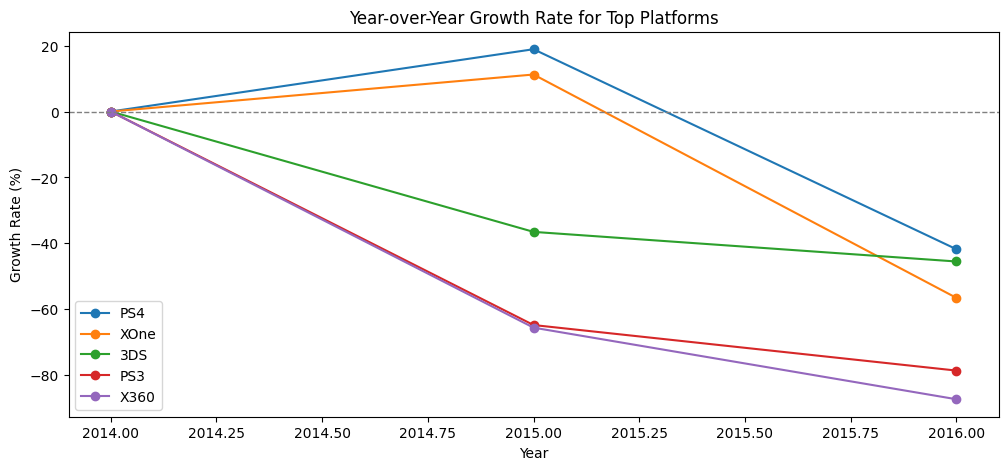

In [39]:
# Visualize top platforms
# Calculate year-over-year growth for each platform
# Your code here to calculate and visualize platform growth rates

# 1. Sort platforms by total sales and select the top N
top_n = 5
platform_totals = df_relevant.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms = platform_totals.head(top_n).index

# 2. Prepare data: group by platform and year
platform_trends = (
    df_relevant[df_relevant['platform'].isin(top_platforms)]
    .groupby(['year_of_release', 'platform'])['total_sales']
    .sum()
    .unstack(fill_value=0)
    .sort_index()
)

# 3. Calculate year-over-year growth rates (in %)
growth_rates = platform_trends.pct_change().fillna(0) * 100

# 4. Plot total sales for top platforms
plt.figure(figsize=(12, 5))
for platform in top_platforms:
    plt.plot(platform_trends.index, platform_trends[platform], marker='o', label=platform)
plt.title('Total Sales for Top Platforms')
plt.xlabel('Year')
plt.ylabel('Total Sales (millions)')
plt.legend()
plt.show()

# 5. Plot year-over-year growth rates for top platforms
plt.figure(figsize=(12, 5))
for platform in top_platforms:
    plt.plot(growth_rates.index, growth_rates[platform], marker='o', label=platform)
plt.title('Year-over-Year Growth Rate for Top Platforms')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

## 3.5 Sales Distribution Analysis

Let's examine the distribution of sales across platforms:

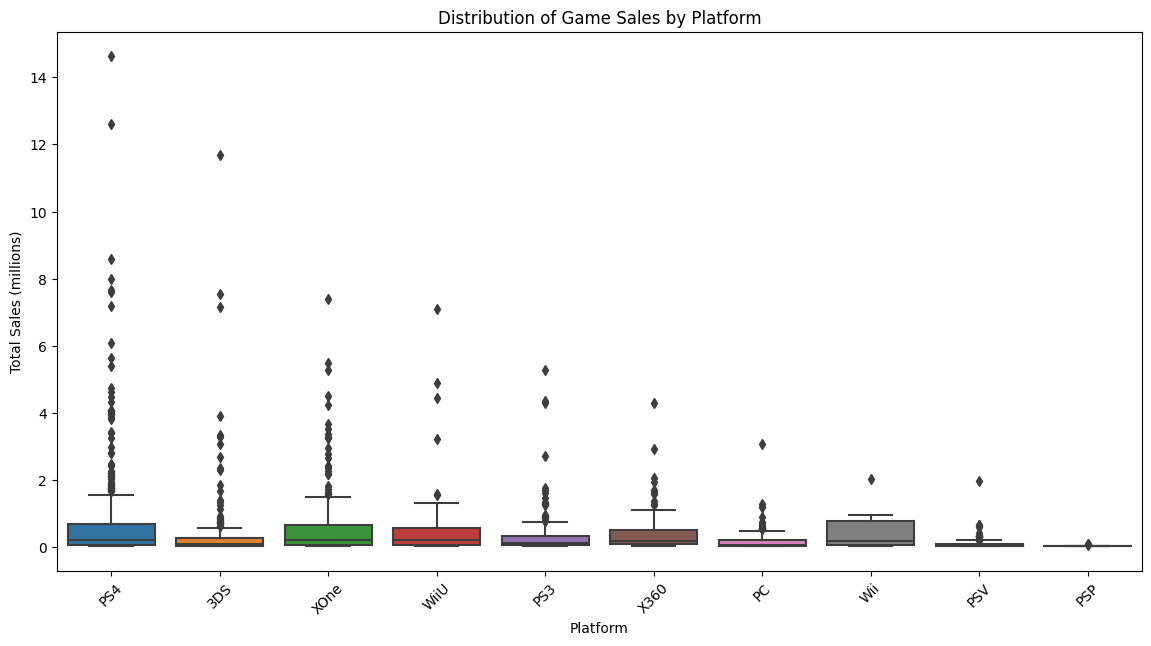

In [40]:
# Create box plot of sales by platform
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_relevant, x='platform', y='total_sales')
plt.title('Distribution of Game Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45)
plt.show()

In [41]:
# Calculate detailed statistics for each platform
platform_stats = df_relevant.groupby('platform')['total_sales'].agg(
    count='count',
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max',
    sum='sum'
).reset_index()

platform_stats

,platform,count,mean,median,std,min,max,sum
0,3DS,212,0.408868,0.090,1.188368,0.01,11.68,86.68
1,PC,151,0.179139,0.060,0.329359,0.01,3.05,27.05
2,PS3,219,0.311324,0.110,0.633059,0.01,5.27,68.18
3,PS4,376,0.766356,0.185,1.614969,0.01,14.63,288.15
4,PSP,13,0.027692,0.020,0.027735,0.01,0.09,0.36
5,PSV,295,0.075932,0.040,0.141591,0.01,1.96,22.40
6,Wii,11,0.460909,0.180,0.625451,0.01,2.01,5.07
7,WiiU,73,0.588767,0.190,1.161467,0.01,7.09,42.98
8,X360,111,0.434414,0.180,0.628967,0.01,4.28,48.22
9,XOne,228,0.615614,0.205,1.046513,0.01,7.39,140.36


In [42]:
# Group by platform and calculate the average sales
avg_sales_per_platform = df.groupby('platform')['total_sales'].mean().sort_values(ascending=False)

avg_sales_per_platform

platform
GB      2.622990
NES     2.561735
GEN     1.050000
SNES    0.836987
PS4     0.801378
X360    0.780227
2600    0.745517
PS3     0.713124
Wii     0.692986
N64     0.689905
XOne    0.645020
PS      0.611412
PS2     0.579953
WiiU    0.559116
3DS     0.503535
GBA     0.385795
DS      0.378491
GC      0.362970
XB      0.313288
SCD     0.310000
DC      0.306731
PC      0.267252
PSP     0.242691
WS      0.236667
SAT     0.194162
PSV     0.125431
NG      0.120000
TG16    0.080000
GG      0.040000
3DO     0.033333
PCFX    0.030000
Name: total_sales, dtype: float64

(Are the differences in sales significant? What about average sales on various platforms?)
I think if you look at the distribution chart, the statistics chart, and the data for the average sales one thing I notice is that 'PS4' ranks highest (like way out ranks the others) on two of the charts but not the data for average sales they're only in the 5th spot for average sales. 'GB', 'NES', 'GEN', and 'SNES' the platforms that come in the top four spots for the average sales I don't even see in the running on the other charts. What does that mean I wonder? How do those four have the highest average sales over all the others that have like the highest distribution of game sales for instance?

## 3.6 Review Score Impact Analysis

Select a popular platform and analyze how reviews affect sales:

In [43]:
# Choose a popular platform based on your previous analysis
popular_platform = 'XOne'  

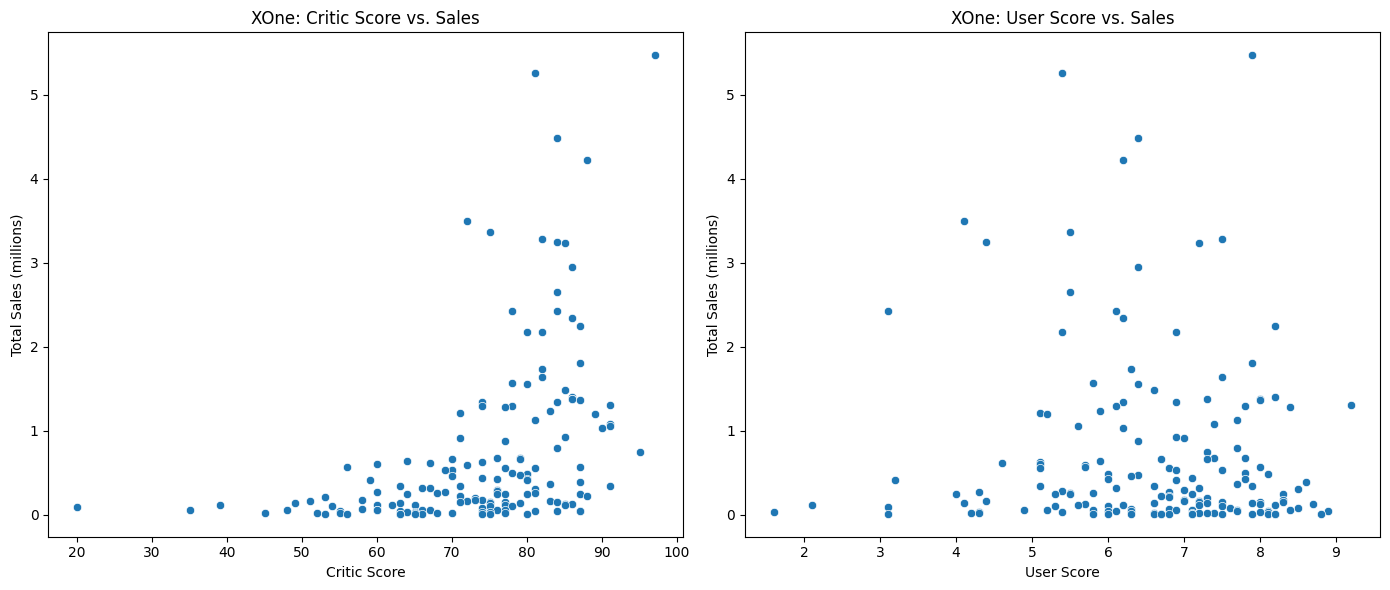

In [44]:
# Create scatter plots for both critic and user scores
df_platform = df_relevant[df_relevant['platform'] == popular_platform].copy()

df_platform['user_score'] = pd.to_numeric(df_platform['user_score'], errors='coerce')

plt.figure(figsize=(14, 6))

# Critic Score vs. Sales
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_platform, x='critic_score', y='total_sales')
plt.title(f'{popular_platform}: Critic Score vs. Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millions)')

# User Score vs. Sales
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_platform, x='user_score', y='total_sales')
plt.title(f'{popular_platform}: User Score vs. Sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales (millions)')

plt.tight_layout()
plt.show()

In [45]:
print("Missing values per column:")
print(df_platform[['total_sales', 'critic_score', 'user_score']].isnull().sum())

Missing values per column:
total_sales      0
critic_score    73
user_score      63
dtype: int64


In [46]:
# Critic Scores
print("Critic Score - Summary Statistics:")
print(df_platform['critic_score'].describe())

# User Scores
print("\nUser Score - Summary Statistics:")
print(df_platform['user_score'].describe())

# Calculate correlations
corr_df = df_platform[['critic_score', 'user_score', 'total_sales']].dropna()

# Convert to float64 (to work for correlation because I was having problems with critic_score)
corr_df = corr_df.astype('float64')

print(corr_df.dtypes)  

if len(corr_df) >= 2:
    corr_critic = corr_df['critic_score'].corr(corr_df['total_sales'])
    corr_user = corr_df['user_score'].corr(corr_df['total_sales'])
    print(f"\nCorrelation coefficient (Critic Score vs. Total Sales): {corr_critic:.2f}")
    print(f"Correlation coefficient (User Score vs. Total Sales): {corr_user:.2f}")
else:
    print("Not enough data to calculate correlation.")

Critic Score - Summary Statistics:
count    155.000000
mean      73.793548
std       12.252589
min       20.000000
25%       66.500000
50%       76.000000
75%       83.000000
max       97.000000
Name: critic_score, dtype: float64

User Score - Summary Statistics:
count    165.000000
mean       6.594545
std        1.375139
min        1.600000
25%        5.800000
50%        6.800000
75%        7.600000
max        9.200000
Name: user_score, dtype: float64
critic_score    float64
user_score      float64
total_sales     float64
dtype: object

Correlation coefficient (Critic Score vs. Total Sales): 0.42
Correlation coefficient (User Score vs. Total Sales): -0.09


Summary findings: There is only a moderate correlation between the Critic Score and Total Sales, which means this could mean it has a somewhat positive impact on sales but it's not really strong enough to say that it does. The correlation between User Score and Total Sales is very weak that it has literally no effect on sales. 

## 3.7 Cross-Platform Comparison

Compare sales performance of games across different platforms:

In [47]:
# Find games released on multiple platforms
platform_counts = df.groupby('name')['platform'].nunique().reset_index()
multi_platform_games = platform_counts[platform_counts['platform'] > 1]['name']

print(f"Number of games on multiple platforms: {len(multi_platform_games)}")
print(multi_platform_games.head())

Number of games on multiple platforms: 2748
2                 Frozen: Olaf's Quest
17              007: Quantum of Solace
18        007: The World is not Enough
33                   11eyes: CrossOver
39    18 Wheeler: American Pro Trucker
Name: name, dtype: object


Average sales of multi-platform games by platform:
platform
NES     4.008519
GB      3.301579
SNES    2.068824
2600    1.786250
GEN     1.645000
PS      0.956188
PS4     0.873769
X360    0.797368
PS2     0.765649
PS3     0.755663
N64     0.699375
XOne    0.603080
Wii     0.501737
GBA     0.384035
WS      0.380000
DS      0.362053
3DS     0.355532
PSP     0.340759
XB      0.332474
DC      0.330000
WiiU    0.317400
PC      0.282188
GC      0.244463
SAT     0.210811
PSV     0.149951
NG      0.110000
Name: total_sales, dtype: float64


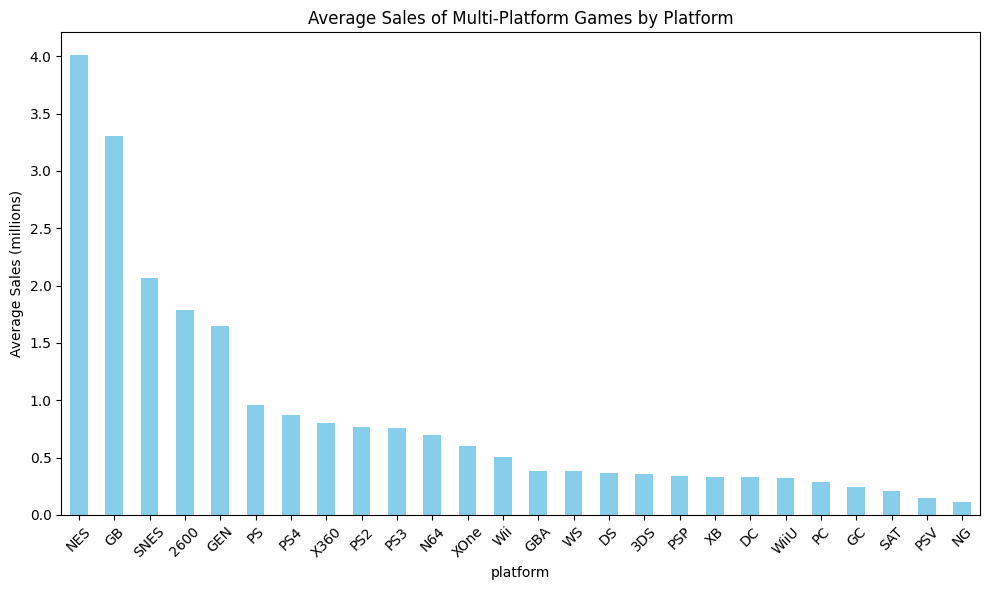

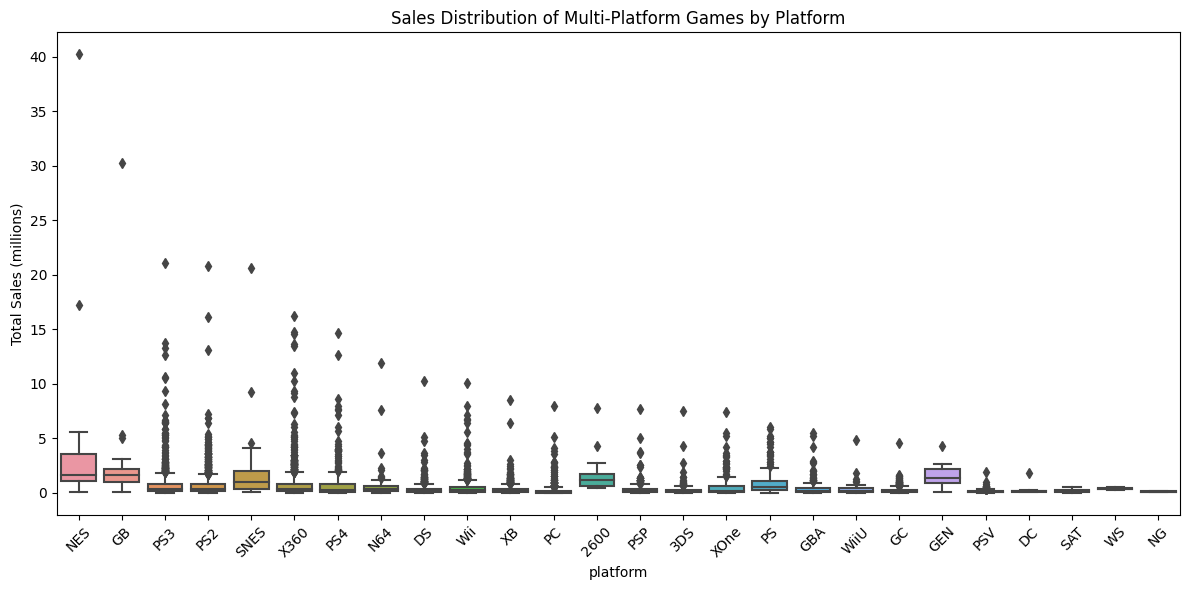

In [48]:
# Compare sales across platforms for these games
multi_platform_sales = df[df['name'].isin(multi_platform_games)]

avg_sales_per_platform = multi_platform_sales.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
print("Average sales of multi-platform games by platform:")
print(avg_sales_per_platform)

# Your code here to analyze and visualize cross-platform performance
plt.figure(figsize=(10,6))
avg_sales_per_platform.plot(kind='bar', color='skyblue')
plt.ylabel('Average Sales (millions)')
plt.title('Average Sales of Multi-Platform Games by Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='platform', y='total_sales', data=multi_platform_sales)
plt.ylabel('Total Sales (millions)')
plt.title('Sales Distribution of Multi-Platform Games by Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3.8 Genre Analysis

Finally, let's examine the distribution of games by genre:

In [49]:
# Analyze genre performance
genre_counts = df['genre'].value_counts().sort_values(ascending=False)
print("Number of games per genre:")
print(genre_counts)

Number of games per genre:
Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64


In [50]:
# Sort genres by total sales
genre_sales = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

genre_sales

genre
Action          1716.52
Sports          1309.67
Shooter         1041.36
Role-Playing     931.08
Platform         825.55
Misc             790.29
Racing           723.49
Fighting         442.66
Simulation       387.96
Puzzle           239.89
Adventure        233.33
Strategy         172.57
Name: total_sales, dtype: float64

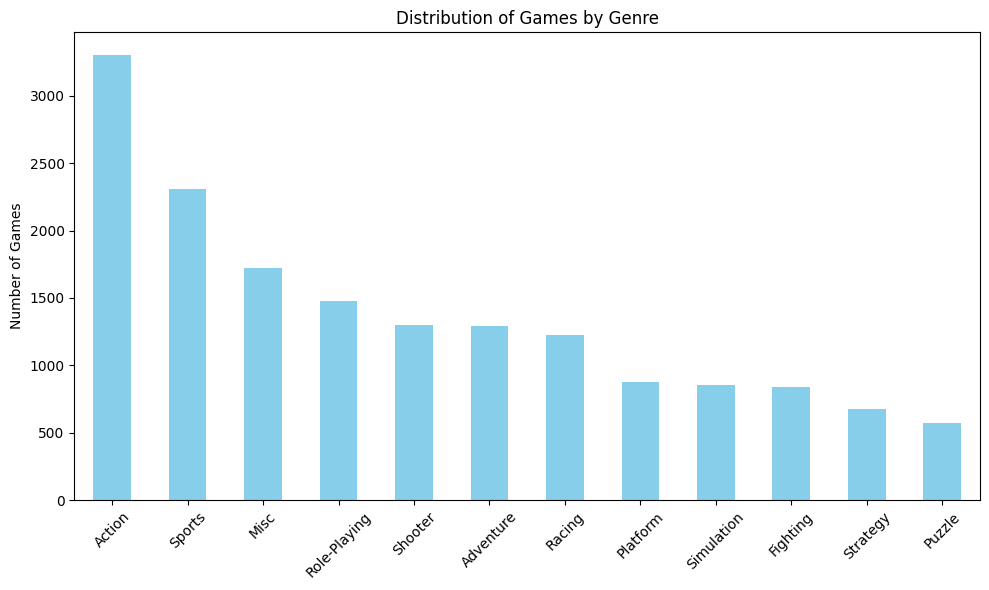

In [51]:
# Visualize genre distribution
# Count games per genre
genre_counts = df['genre'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,6))
genre_counts.plot(kind='bar', color='skyblue')
plt.ylabel('Number of Games')
plt.title('Distribution of Games by Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

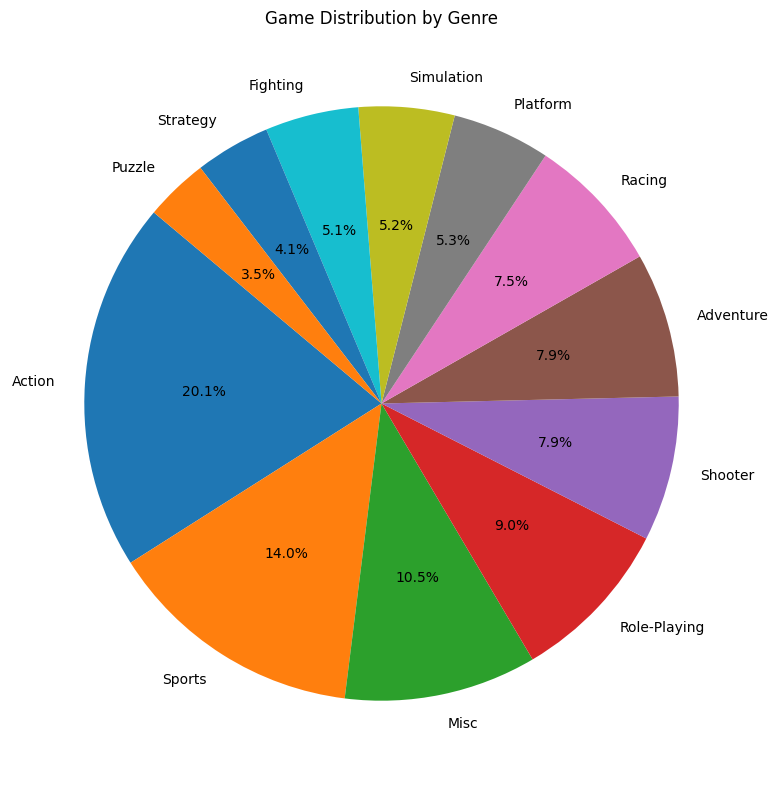

In [52]:
#Trying this one for fun, if it's wrong please let me know and I'll just delete it. 
plt.figure(figsize=(8,8))
genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.ylabel('')
plt.title('Game Distribution by Genre')
plt.tight_layout()
plt.show()

In [53]:
# Calculate market share for each genre
genre_sales = df.groupby('genre')['total_sales'].sum()

total_sales = df['total_sales'].sum()

market_share = (genre_sales / total_sales) * 100
market_share.sort_values(ascending=False)

genre
Action          19.474109
Sports          14.858351
Shooter         11.814344
Role-Playing    10.563205
Platform         9.365956
Misc             8.965927
Racing           8.208074
Fighting         5.022027
Simulation       4.401449
Puzzle           2.721579
Adventure        2.647155
Strategy         1.957826
Name: total_sales, dtype: float64

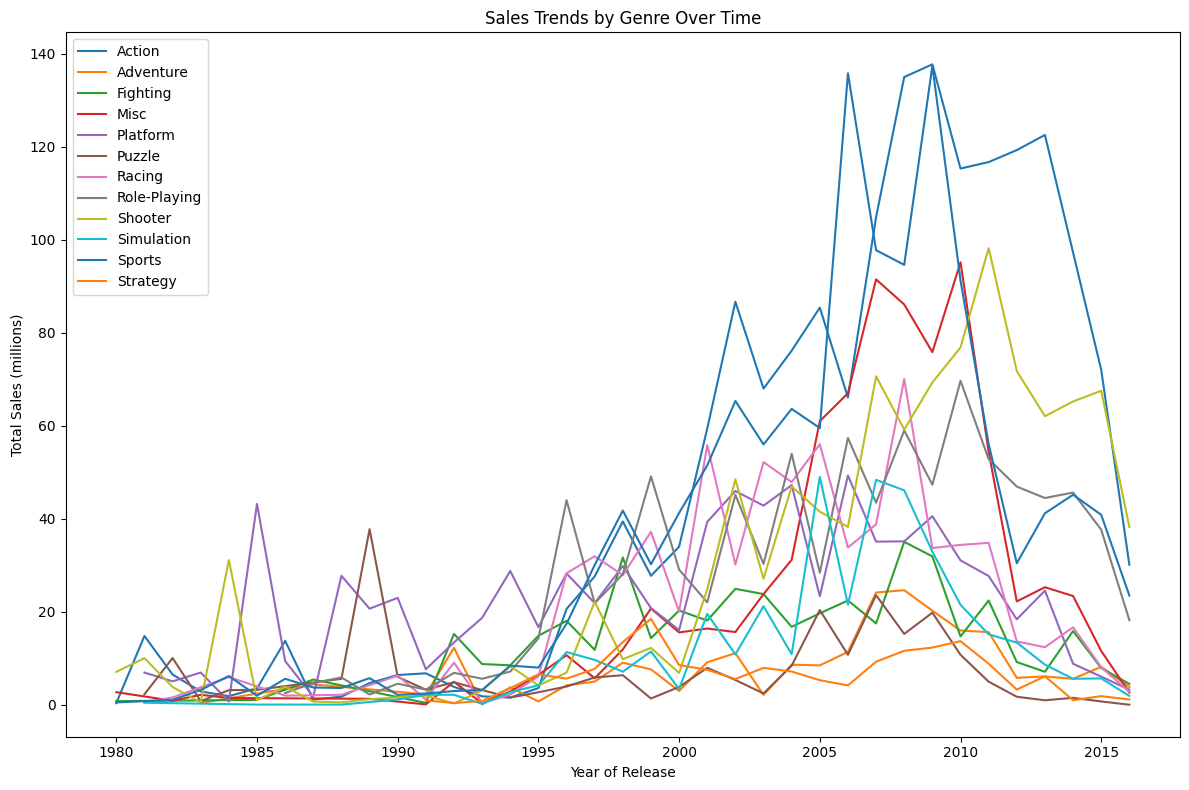

In [54]:
genre_year_sales = df.groupby(['genre', 'year_of_release'])['total_sales'].sum().reset_index()

plt.figure(figsize=(12,8))
for genre in genre_year_sales['genre'].unique():
    genre_data = genre_year_sales[genre_year_sales['genre'] == genre]
    plt.plot(genre_data['year_of_release'], genre_data['total_sales'], label=genre)

plt.xlabel('Year of Release')
plt.ylabel('Total Sales (millions)')
plt.title('Sales Trends by Genre Over Time')
plt.legend()
plt.tight_layout()
plt.show()

In [55]:
genre_sales_stats = df.groupby('genre')['total_sales'].agg(['mean', 'median', 'sum', 'count']).sort_values(by='mean', ascending=False)
genre_sales_stats

,mean,median,sum,count
genre,,,,
Platform,0.940262,0.27,825.55,878
Shooter,0.803519,0.24,1041.36,1296
Role-Playing,0.628683,0.18,931.08,1481
Racing,0.590122,0.19,723.49,1226
Sports,0.567940,0.22,1309.67,2306
Fighting,0.528865,0.21,442.66,837
Action,0.519057,0.19,1716.52,3307
Misc,0.459204,0.16,790.29,1721
Simulation,0.452695,0.15,387.96,857


### Key Questions for Genre Analysis:
- Which genres consistently perform well?
- Are there any genres showing recent growth or decline?
- How does the average performance vary across genres?

While 'Action' and 'Sports' genres have the highest total sales, they also have the largest number of releases. When considering the average sales per game, 'Platform' and 'Shooter' genres outperform others, each averaging over 0.8 million sales per title. 'Action' games, despite their total sales, only rank in the middle for average sales per game. The median sales per game for all genres are lower than their averages, indicating that a few blockbuster titles are skewing the results upward, most games actually sell less than the mean.
This analysis shows that, for commercial success per game, 'Platform', 'Shooter', and 'Role-Playing' genres are safest bets, while genres like 'Puzzle', 'Strategy', and Adventure' typically see lower returns per release.

Conclusion:  
Total sales alone can be misleading; average and median sales per game provide a clearer picture of genre performance and commercial risk. 'Platform' and 'Shooter' games are the most successful on a per-game basis, while 'Action’s' high total sales are due to its large number of releases, not individual game success.

# Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

## 4.1 Regional Platform Analysis

Let's begin by examining platform performance across different regions:

In [56]:
# Function to analyze platform performance by region
def analyze_platform_performance_by_region(df):
    # Aggregate sales by platform for each region
    region_cols = ['platform', 'na_sales', 'eu_sales', 'jp_sales']
    region_sales = df[region_cols].groupby('platform').sum()
    
    # Sort platforms by sales in each region
    na_top = region_sales['na_sales'].sort_values(ascending=False)
    eu_top = region_sales['eu_sales'].sort_values(ascending=False)
    jp_top = region_sales['jp_sales'].sort_values(ascending=False)
    
    # Optionally, get the top N platforms per region
    top_n = 5
    return {
        'North America': na_top.head(top_n),
        'Europe': eu_top.head(top_n),
        'Japan': jp_top.head(top_n)
    }

In [57]:
# Analyze each region
region_results = analyze_platform_performance_by_region(df)
print("Top Platforms in North America:")
print(region_results['North America'])
print("\nTop Platforms in Europe:")
print(region_results['Europe'])
print("\nTop Platforms in Japan:")
print(region_results['Japan'])

Top Platforms in North America:
platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64

Top Platforms in Europe:
platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64

Top Platforms in Japan:
platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: jp_sales, dtype: float64


North America prefers Xbox and Nintendo (especially X360 and Wii), while Europe strongly favors Sony’s PlayStation family. Japan is unique in its preference for Nintendo handhelds and older consoles, with strong support for Sony but little for Xbox. The Xbox 360 is notably strong only in North America, while platforms like DS and SNES are most successful in Japan.

### Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:

In [58]:
# Create a comparative platform analysis
comparison = pd.DataFrame({
    'North America': region_results['North America'],
    'Europe': region_results['Europe'],
    'Japan': region_results['Japan']
})
comparison

,North America,Europe,Japan
platform,,,
3DS,NaN,NaN,100.62
DS,380.31,NaN,175.02
PS,NaN,212.39,139.78
PS2,572.92,332.63,137.54
PS3,390.13,327.21,NaN
SNES,NaN,NaN,116.55
Wii,486.87,258.32,NaN
X360,595.74,268.32,NaN


In [59]:
platform_region_sales = df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

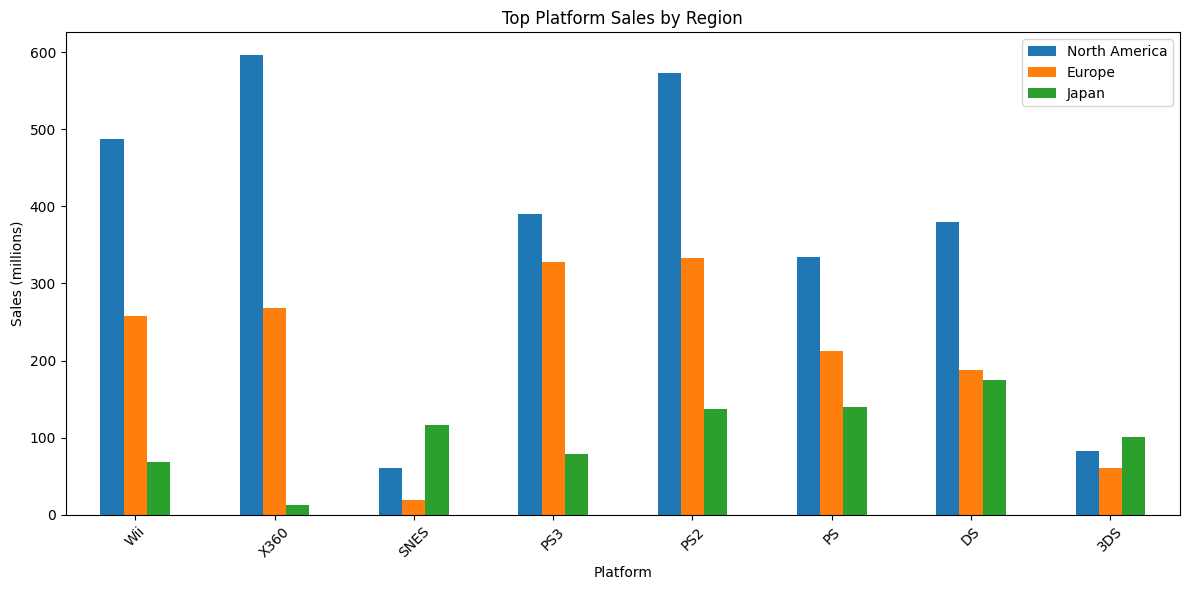

In [60]:
# Visualize cross-regional comparison for top platforms
# Extract top platforms from region_results
top_na = region_results['North America']
top_eu = region_results['Europe']
top_jp = region_results['Japan']

# Visualize cross-regional comparison for top platforms
top_platforms = set(top_na.index) | set(top_eu.index) | set(top_jp.index)

# Filter the grouped sales data to these platforms
filtered_sales = platform_region_sales.loc[list(top_platforms)]

filtered_sales[['na_sales', 'eu_sales', 'jp_sales']].plot(
    kind='bar',
    figsize=(12, 6)
)
plt.title('Top Platform Sales by Region')
plt.ylabel('Sales (millions)')
plt.xlabel('Platform')
plt.xticks(rotation=45)
plt.legend(['North America', 'Europe', 'Japan'])
plt.tight_layout()
plt.show()

## 4.2 Regional Genre Analysis

Now let's examine genre preferences across regions:

In [61]:
# Function to analyze genre performance by region
def analyze_genre_performance_by_region(df, top_n=5):
    """
    Aggregates sales by genre for each region and returns the top N genres by sales in NA, EU, and JP.

    Parameters:
    - df: pandas DataFrame with columns 'genre', 'na_sales', 'eu_sales', 'jp_sales'
    - top_n: number of top genres to return per region

    Returns:
    - Dictionary with region names as keys and top N genres (with sales) as values
    """
    # Aggregate sales by genre for each region
    region_cols = ['genre', 'na_sales', 'eu_sales', 'jp_sales']
    genre_sales = df[region_cols].groupby('genre').sum()

    # Sort genres by sales in each region
    na_top = genre_sales['na_sales'].sort_values(ascending=False).head(top_n)
    eu_top = genre_sales['eu_sales'].sort_values(ascending=False).head(top_n)
    jp_top = genre_sales['jp_sales'].sort_values(ascending=False).head(top_n)

    return {
        'North America': na_top,
        'Europe': eu_top,
        'Japan': jp_top
    }

In [62]:
genre_results = analyze_genre_performance_by_region(df)

print("Top Genres in North America:")
print(genre_results['North America'])
print("\nTop Genres in Europe:")
print(genre_results['Europe'])
print("\nTop Genres in Japan:")
print(genre_results['Japan'])

Top Genres in North America:
genre
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57
Name: na_sales, dtype: float64

Top Genres in Europe:
genre
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
Name: eu_sales, dtype: float64

Top Genres in Japan:
genre
Role-Playing    353.39
Action          160.14
Sports          134.93
Platform        130.71
Misc            107.02
Name: jp_sales, dtype: float64


### Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

In [63]:
# Create a comparative genre analysis

The top-selling genres show both similarities and regional differences:

North America:
The most popular genres are Action, Sports, and Shooter, with Action games leading by a significant margin. Platform and Misc. genres also appear in the top 5, but with lower sales.

Europe:
Europe’s preferences closely mirror North America, with Action, Sports, and Shooter again in the top 3. However, Racing games are more popular in Europe than in North America, taking the fourth spot. The Misc. genre rounds out the top five.

Japan:
Japan’s preferences are distinct. Role-Playing is the top genre by a wide margin, a unique feature compared to NA and EU. Action and Sports follow, but with much lower sales than Role-Playing. Platform and Misc. genres also make the top 5, but Shooter and Racing do not appear.

Summary:
Action is a top genre worldwide, but Role-Playing is especially dominant in Japan.
Shooter games are much less popular in Japan.
Racing games are more important in Europe than in the other regions.
Developers should consider these preferences when targeting specific regions.

## 4.3 ESRB Rating Impact Analysis

Finally, let's examine how ESRB ratings affect sales in each region:

In [64]:
# Function to analyze ESRB rating impact
def analyze_esrb_rating_impact(df, top_n=5):
    """
    Aggregates sales by ESRB rating for each region and returns the top N ratings by sales in NA, EU, and JP.

    Parameters:
    - df: pandas DataFrame with columns 'rating', 'na_sales', 'eu_sales', 'jp_sales'
    - top_n: number of top ratings to return per region

    Returns:
    - Dictionary with region names as keys and top N ESRB ratings (with sales) as values
    """
    # Aggregate sales by ESRB rating for each region
    region_cols = ['rating', 'na_sales', 'eu_sales', 'jp_sales']
    rating_sales = df[region_cols].groupby('rating').sum()

    # Sort ratings by sales in each region
    na_top = rating_sales['na_sales'].sort_values(ascending=False).head(top_n)
    eu_top = rating_sales['eu_sales'].sort_values(ascending=False).head(top_n)
    jp_top = rating_sales['jp_sales'].sort_values(ascending=False).head(top_n)

    return {
        'North America': na_top,
        'Europe': eu_top,
        'Japan': jp_top
    }

In [65]:
# Analyze ESRB impact for each region
rating_results = analyze_esrb_rating_impact(df)
print("Top ESRB Ratings by sales in North America:")
print(rating_results['North America'])
print("\nTop ESRB Ratings by sales in Europe:")
print(rating_results['Europe'])
print("\nTop ESRB Ratings by sales in Japan:")
print(rating_results['Japan'])

Top ESRB Ratings by sales in North America:
rating
E       1274.24
T        747.60
M        742.89
E10+     345.50
K-A        2.56
Name: na_sales, dtype: float64

Top ESRB Ratings by sales in Europe:
rating
E       703.87
M       480.00
T       421.79
E10+    183.35
AO        0.61
Name: eu_sales, dtype: float64

Top ESRB Ratings by sales in Japan:
rating
E       197.96
T       150.70
M        63.58
E10+     40.20
K-A       1.46
Name: jp_sales, dtype: float64


The impact of ESRB ratings on sales varies by region, but some trends emerge:

- E (Everyone) rated games have the highest sales in all regions, indicating broad appeal and accessibility.
- T (Teen) and M (Mature) rated games are also very popular in North America and Europe.
- Japan has lower sales for all ratings, but the relative ranking is similar.
- E10+ and K-A ratings contribute little to the overall sales.
- AO (Adults Only) games have almost no sales impact.

Overall, games that are accessible to wider audiences (E, T, M) tend to perform best in every region, but especially in North America and Europe.

# Step 5 : Hypothesis Tests

—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

Set the *alpha* threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses

—What criteria you used to test the hypotheses~~,~~ and why


In [66]:
import scipy.stats as stats

alpha = 0.05  # set your significance threshold

# 1. Xbox One vs. PC platforms
xbox_one_scores = df[df['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df[df['platform'] == 'PC']['user_score'].dropna()

t_stat1, p_val1 = stats.ttest_ind(xbox_one_scores, pc_scores, equal_var=False)

print("Xbox One vs. PC user ratings:")
print(f"t-statistic = {t_stat1:.3f}, p-value = {p_val1}")
if p_val1 < alpha:
    print("Reject the null hypothesis: average user ratings are different.")
else:
    print("Fail to reject the null hypothesis: no evidence of difference.")


# 2. Action vs. Sports genres
action_scores = df[df['genre'] == 'Action']['user_score'].dropna()
sports_scores = df[df['genre'] == 'Sports']['user_score'].dropna()

t_stat2, p_val2 = stats.ttest_ind(action_scores, sports_scores, equal_var=False)

print("\nAction vs. Sports genre user ratings:")
print(f"t-statistic = {t_stat2:.3f}, p-value = {p_val2:.3f}")
if p_val2 < alpha:
    print("Reject the null hypothesis: average user ratings are different.")
else:
    print("Fail to reject the null hypothesis: no evidence of difference.")

Xbox One vs. PC user ratings:
t-statistic = -4.671, p-value = 4.5385802963771835e-06
Reject the null hypothesis: average user ratings are different.

Action vs. Sports genre user ratings:
t-statistic = 1.789, p-value = 0.074
Fail to reject the null hypothesis: no evidence of difference.


Hypothesis Test:

1. Xbox One vs. PC User Ratings:

-Null hypothesis (H₀): The average user ratings for Xbox One and PC platforms are equal.
-Alternative hypothesis (H₁): The average user ratings for Xbox One and PC platforms are not equal.
- Test Used: Independent samples t-test.
- Significance Level (α): 0.05.
- Criterion: If p-value < 0.05, reject H₀; otherwise, fail to reject H₀.

2. Action vs. Sports Genres User Ratings:

- Null hypothesis (H₀): The average user ratings for Action and Sports genres are equal.
- Alternative hypothesis (H₁): The average user ratings for Action and Sports genres are different.
- Test Used: Independent samples t-test.
- Significance Level (α): 0.05.
- Criterion: If p-value < 0.05, reject H₀; otherwise, fail to reject H₀.

Why:
I chose the t-test because it's meant to compare the means of two independent groups (For Example: Xbox One and PC platforms user ratings or Action and Sports genres user ratings). I used the common alpha threshold of 0.05, it's the one I've been taught to use the most so far. The test criterion if the p-value is less than the alpha (because if the p-value is less than the alpha it is statistically significant).

# Step 6. Write a general conclusion


This project provided a comprehensive analysis of video game sales and user preferences across different regions, platforms, and genres. By examining sales data, we identified significant variations in market shares that reflect distinct regional preferences. For example, the Xbox platform dominated in North America, Sony's Playstations were most popular in Europe, and the little Nintendo handhelds were the biggest sellers in Japan. We also looked at the impact of ESRB ratings on sales, and found that games rated 'E' for (Everyone) have consistently achieved the highest sales in all regions. In the Genre anaylsis we found that 'Action' and 'Sports' games are among the most popular worldwide except I would say in Japan where their general favorite tends to be 'Role-Playing' games. Hypothesis testing was done to compare user ratings between platforms (Xbox One vs. PC) and genres (Action vs. Sports). Using independent sample t-test, we determined whether observed differences in average user ratings were statistically significant, providing insights into player preferences. Overall, this project demonstrated the value of data anaylsis for understanding the global video game market. Regional differences, the influence of content ratings, and genre and platform popularity are all key factors that shape industry trends.